In [2]:
# Packages
import numpy as np

from RBM.optimizator.energy_optimizator import Optimizator

In [3]:
# Here starts the main program with variable declarations

# Number particle 
Number_particles = 2

# Dimension
Dimension = 2

# Number hidden layer
Number_hidden_layer = 1

# Number Monte Carlos cycles
Number_MC_cycles = 10**4

# Type algorithm
#Algorithm = 'Metropolis'    
Algorithm = 'MetropolisHastings'

# Interaction
Interaction = True

# Instantce class Optimizator
algorithm_1= Optimizator(Number_particles, Dimension, Number_hidden_layer, Interaction, Algorithm = Algorithm, Number_MC_cycles = Number_MC_cycles) 

In [4]:
# Packages 
from RBM.utils.path_save_output import SaveOutput

# Name where will be saving outputs  (file or figure)
save = SaveOutput(f'Result_varying_learning_rate_{Algorithm}') 

# Decide to save output  
SAVE_OUTPUT = False

# Maximum the iterations (The best option it is a power 2 if you would like to do the stadistic analysis with blocking)
Maximum_iterations = 2**6

# Different trying with learning rate 
Low = 0.001
High = 0.8
Number_trying_learning_rate = 10
learning_rate_range = np.linspace(Low,High,Number_trying_learning_rate)

# Set up the number decimal 
learning_rate_range = np.around(learning_rate_range,3)

# Saves output 
Energies_trying_learning_rate = []
Optimal_parameter_a_learning_rate =[]
Optimal_parameter_b_learning_rate =[]
Optimal_parameter_w_learning_rate =[]

# Trying the diffferent learning rate 
for  learning_rate in learning_rate_range:

    Energies, Optimal_parameter_a, Optimal_parameter_b, Optimal_parameter_w, Iteration_number, Time_CPU = algorithm_1.gradient_descent(learning_rate, Maximum_iterations)

    # Save all output
    Energies_trying_learning_rate.append(Energies) 
    Optimal_parameter_a_learning_rate.append(Optimal_parameter_a)
    Optimal_parameter_b_learning_rate.append(Optimal_parameter_b)
    Optimal_parameter_w_learning_rate.append(Optimal_parameter_w)
    

# Saves or does not save the output (format .dat one for each learning rate)
if SAVE_OUTPUT == True :
    # Just to saves ther energies output for each learning rate in a external file
    for  i in range(len(Energies_trying_learning_rate)):
        outfile = open(save.data_path( f'energies_with_learning_rate_{learning_rate_range[i]}' +'.dat'),'w')
        outfile.write(f'# Energies, lerning rate {learning_rate_range[i]}:\n')
        for j in range(len(Energies)):
            outfile.write('%f \n' %(Energies_trying_learning_rate[i][j]))
        outfile.close()

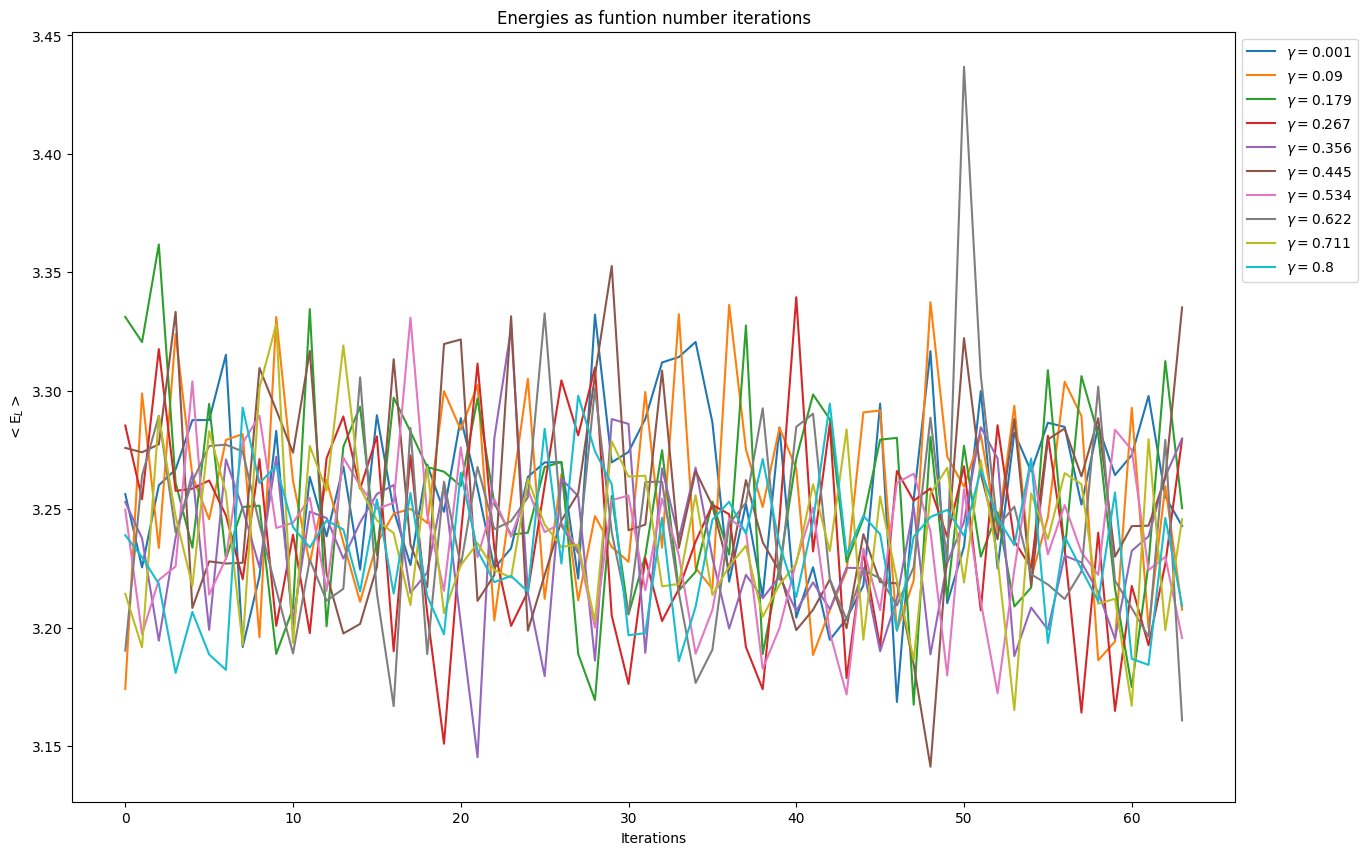

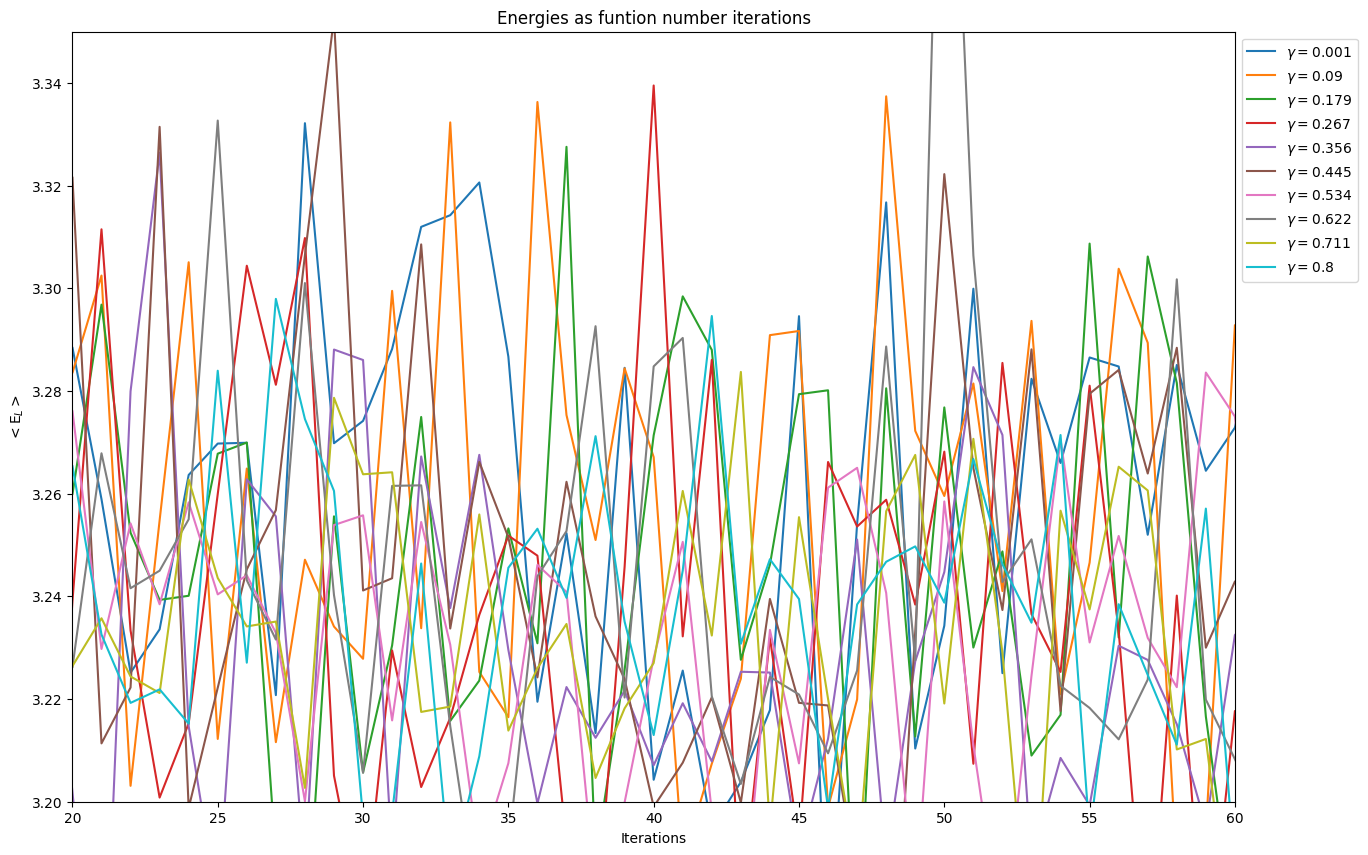

In [7]:
# Packages
import matplotlib.pyplot as plt

%matplotlib inline

# Decide to save output  
SAVE_OUTPUT = True

# Plot the energies vs the number iteration for each learning rate
fig = plt.figure(figsize=(15,10))
for i in range(len(Energies_trying_learning_rate)): 
    plt.plot(Iteration_number, Energies_trying_learning_rate[i], label= f'$\gamma = ${learning_rate_range[i]}')
    plt.xlabel("Iterations")
    plt.ylabel("$<$E$_{L}$$>$")
    plt.title("Energies as funtion number iterations")
    
   

# The exact solution     
#plt.axhline(y = 0.5, color = 'r', linestyle = 'dashed', label = 'Exact')

# Saves or does not save the output
if SAVE_OUTPUT == True:
    plt.savefig(save.figure_path(f'energies_vs_learning_rate_{Number_particles}p_{Dimension}D_{Number_hidden_layer}H') + ".png", format='png',dpi= 800 )
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

# Plot the energies vs the number iteration for each learning rate (doing a zoom)
fig = plt.figure(figsize=(15,10))
for i in range(len(Energies_trying_learning_rate)): 
    plt.plot(Iteration_number, Energies_trying_learning_rate[i], label= f'$\gamma = ${learning_rate_range[i]}')
    plt.xlabel("Iterations")
    plt.ylabel("$<$E$_{L}$$>$")
    plt.title("Energies as funtion number iterations")
    
   

# The exact solution     
#plt.axhline(y = 0.5, color = 'r', linestyle = 'dashed', label = 'Exact')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
#plt.ylim(0.4999,0.5001)
plt.ylim(3.20,3.35)
plt.xlim(20,60)

# Saves or does not save the output
if SAVE_OUTPUT == True:
    plt.savefig(save.figure_path(f'energies_vs_learning_rate_zoom_{Number_particles}p_{Dimension}D_{Number_hidden_layer}H') + ".png", format='png',dpi= 800 )
plt.show()

# Save and Plot the data using panda 

In [9]:
import pandas as pd
from pandas import DataFrame

# Saves all output using pandas 
data = {}
for i in range(len(Energies_trying_learning_rate)):
    data[f'Energies wirh learning rate: {learning_rate_range[i]}'] = Energies_trying_learning_rate[i]

# Nice panda viw of the data
Nice_panda_view =  pd.DataFrame(data)

# Decide to save output  
SAVE_OUTPUT = True

# Saves or does not save the output
if SAVE_OUTPUT == True:
    # Save a external file called f'energies_vs_learning_rate.csv'  in .csv format using panda
    Nice_panda_view.to_csv(save.data_path(f'energies_vs_learning_rate_{Number_particles}p_{Dimension}d_{Number_hidden_layer}h.csv'), index=True)

# Read the external .csv data format with pandas  
save_output = pd.read_csv(save.data_path(f'energies_vs_learning_rate_{Number_particles}p_{Dimension}d_{Number_hidden_layer}h.csv'))

# Choose one of the data 
Energies_learninf_rate_1 = save_output[f'Energies wirh learning rate: {learning_rate_range[i]}']

# Transform to numpy class
save_output_numpy = np.array(save_output)

#print(save_output_numpy[:,0])

# Print nice view
Nice_panda_view

,Energies wirh learning rate: 0.001,Energies wirh learning rate: 0.09,Energies wirh learning rate: 0.179,Energies wirh learning rate: 0.267,Energies wirh learning rate: 0.356,Energies wirh learning rate: 0.445,Energies wirh learning rate: 0.534,Energies wirh learning rate: 0.622,Energies wirh learning rate: 0.711,Energies wirh learning rate: 0.8
0,3.256429,3.174129,3.331193,3.285363,3.253044,3.275926,3.249809,3.190372,3.214317,3.239058
1,3.225477,3.298924,3.320599,3.254262,3.237787,3.274078,3.197256,3.264164,3.191748,3.229818
2,3.260140,3.233667,3.361792,3.317620,3.194579,3.277429,3.220187,3.289429,3.289148,3.218542
3,3.266841,3.323919,3.261313,3.257784,3.238109,3.333302,3.225882,3.240220,3.247063,3.180952
4,3.287657,3.264078,3.233804,3.258708,3.265315,3.208366,3.304031,3.261730,3.217640,3.206676
...,...,...,...,...,...,...,...,...,...,...
59,3.264471,3.194182,3.216582,3.164919,3.195329,3.230006,3.283603,3.219892,3.212224,3.257101
60,3.272875,3.292838,3.174934,3.217669,3.232478,3.242908,3.275035,3.208278,3.167111,3.186899
61,3.297831,3.199924,3.226896,3.192633,3.238589,3.243100,3.224364,3.196257,3.279624,3.184343
62,3.255390,3.259780,3.312560,3.226963,3.263834,3.263285,3.229949,3.279317,3.198930,3.246364


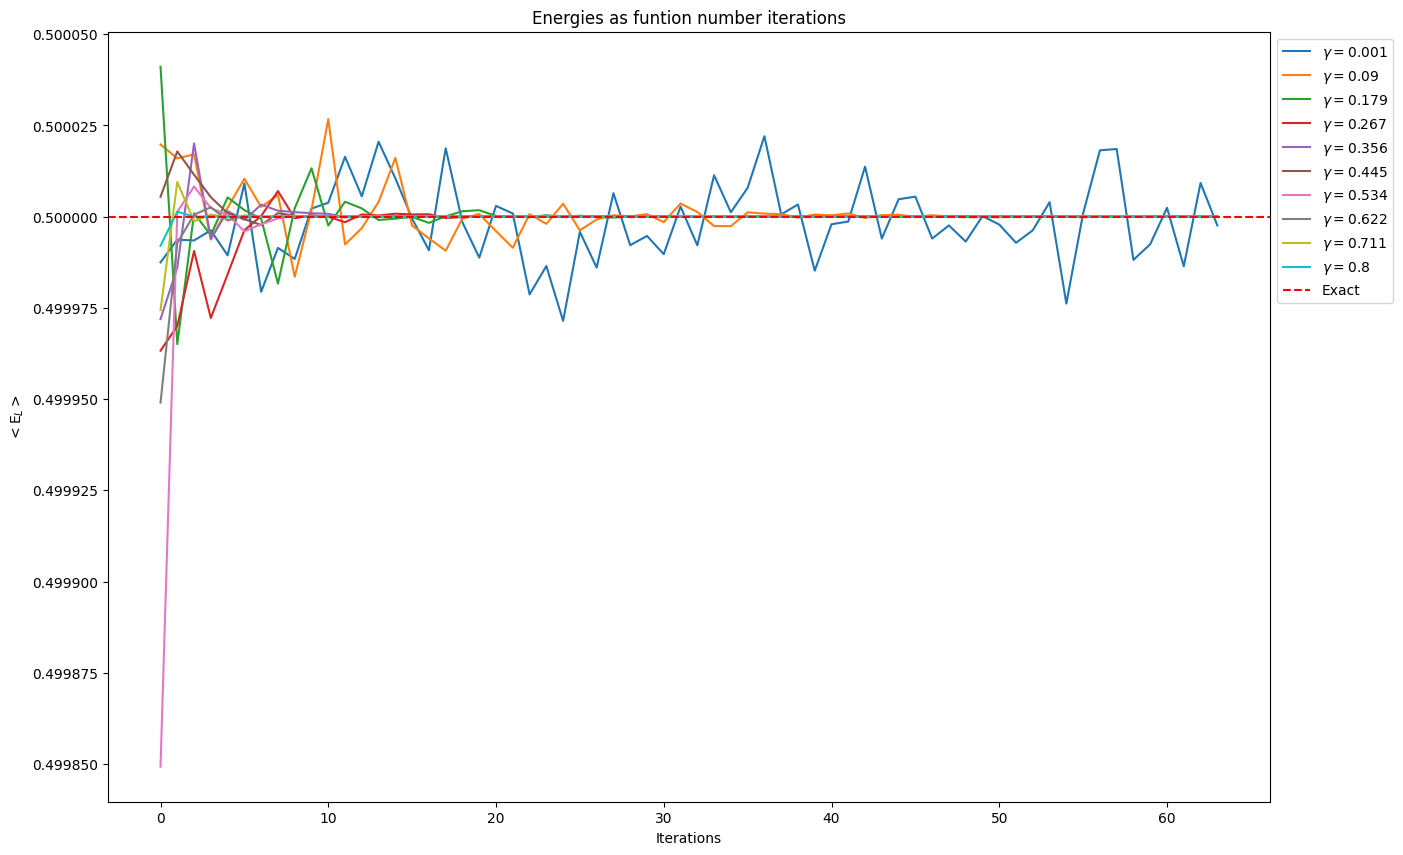

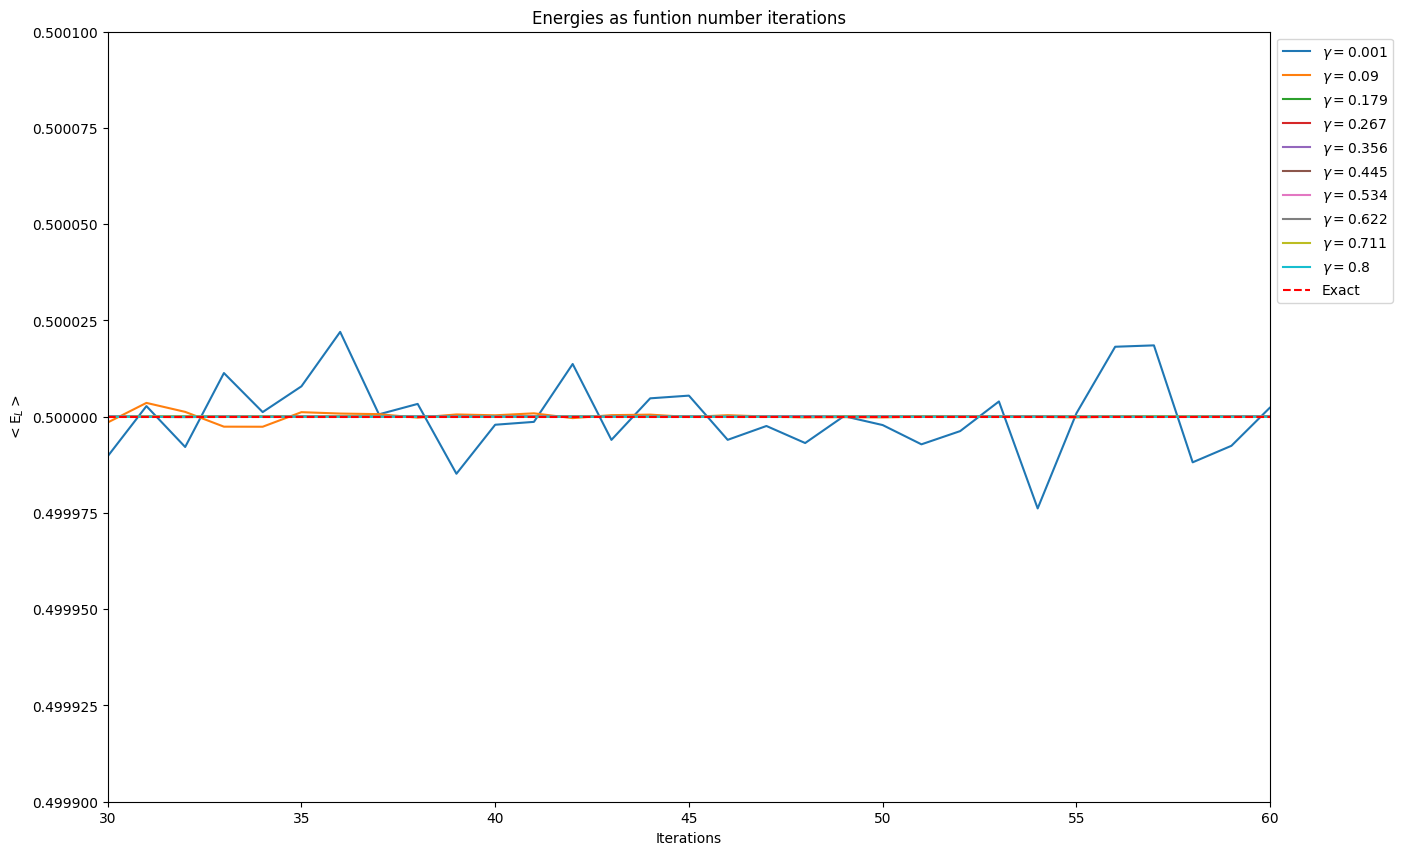

,Unnamed: 0,Energies wirh learning rate: 0.001,Energies wirh learning rate: 0.09,Energies wirh learning rate: 0.179,Energies wirh learning rate: 0.267,Energies wirh learning rate: 0.356,Energies wirh learning rate: 0.445,Energies wirh learning rate: 0.534,Energies wirh learning rate: 0.622,Energies wirh learning rate: 0.711,Energies wirh learning rate: 0.8
0,0,0.499987,0.500020,0.500041,0.499963,0.499972,0.500005,0.499849,0.499949,0.499974,0.499992
1,1,0.499994,0.500016,0.499965,0.499970,0.499986,0.500018,0.500001,0.499993,0.500009,0.500001
2,2,0.499993,0.500017,0.500001,0.499991,0.500020,0.500011,0.500008,0.500001,0.499999,0.500000
3,3,0.499996,0.499994,0.499995,0.499972,0.499994,0.500005,0.500002,0.500003,0.500001,0.500000
4,4,0.499989,0.500002,0.500005,0.499984,0.500001,0.500001,0.500001,0.499999,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
59,59,0.499992,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
60,60,0.500002,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
61,61,0.499986,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
62,62,0.500009,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [14]:
# Packages
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Decide to save output  
SAVE_OUTPUT = False

# ID data has to be in .csv format
ID_data = '/home/luis/Downloads/University/Computational_Physics 2_Quantum_Mechanical _Systems/Classes/code-ipynb/project_2/Result_varying_learning_rate_MetropolisHastings/DataFile/energies_vs_learning_rate_1p_1d_1h.csv'

# Read the external .csv data format with pandas  
save_output = pd.read_csv(ID_data)

# Transform to numpy class
save_output_numpy = np.array(save_output)

# Different trying learning rate 
Low = 0.001
High = 0.8
Number_trying_learning_rate = 10
learning_rate_range = np.linspace(Low,High,Number_trying_learning_rate)

# Set up the number decimal 
learning_rate_range = np.around(learning_rate_range,3)

# Plot the energies vs the number iteration for each learning rate using information saved  
fig = plt.figure(figsize=(15,10))
for i in range(0,len(learning_rate_range)): 
    plt.plot(save_output_numpy[:,0], save_output_numpy[:,i+1], label= f'$\gamma = ${learning_rate_range[i]}')
    plt.xlabel("Iterations")
    plt.ylabel("$<$E$_{L}$$>$")
    plt.title("Energies as funtion number iterations")
    
   

# The exact solution     
plt.axhline(y = 0.5, color = 'r', linestyle = 'dashed', label = 'Exact')

# Saves or does not save the output
if SAVE_OUTPUT == True:
    plt.savefig(save.figure_path(f'energies_vs_learning_rate_{Number_particles}p_{Dimension}D_{Number_hidden_layer}H') + ".png", format='png',dpi= 800 )
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

# Plot the energies vs the number iteration for each learning rate (doing a zoom)
fig = plt.figure(figsize=(15,10))
for i in range(0,len(learning_rate_range)): 
    plt.plot(save_output_numpy[:,0], save_output_numpy[:,i+1], label= f'$\gamma = ${learning_rate_range[i]}')
    plt.xlabel("Iterations")
    plt.ylabel("$<$E$_{L}$$>$")
    plt.title("Energies as funtion number iterations")
    
   

# The exact solution     
plt.axhline(y = 0.5, color = 'r', linestyle = 'dashed', label = 'Exact')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.ylim(0.4999,0.5001)
plt.xlim(30,60)

# Saves or does not save the output
if SAVE_OUTPUT == True:
    plt.savefig(save.figure_path(f'energies_vs_learning_rate_zoom_{Number_particles}p_{Dimension}D_{Number_hidden_layer}H') + ".png", format='png',dpi= 800 )
plt.show()

# Print a nice view with pandas 
save_output